In [11]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.decomposition import PCA

random.seed(1)

rna_embeddings = np.loadtxt('./output/exprs_10xPBMC_rna_harder_filtered_embeddings.txt')
atac_embeddings = np.loadtxt('./output/exprs_10xPBMC_atac_harder_filtered_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)
pca = PCA(n_components=30)
pca_result = pca.fit_transform(embeddings)

tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(pca_result)
tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = tsne_results[:,0]
df['tSNE2'] = tsne_results[:,1]
print("done")


(8437, 64)
(8437, 64)
(16874, 64)


/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


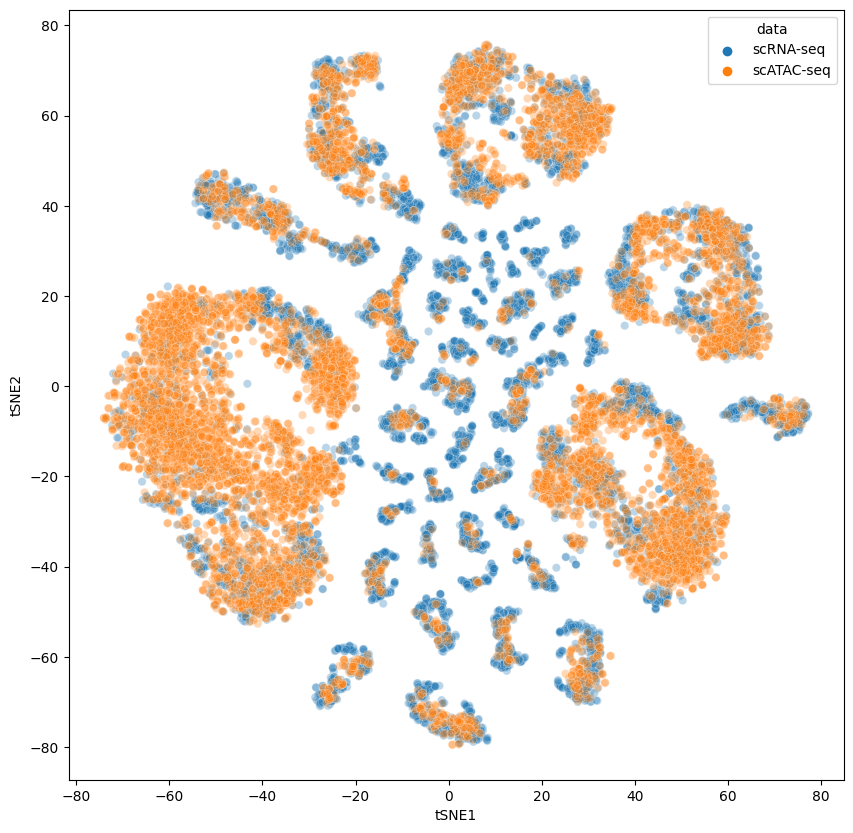

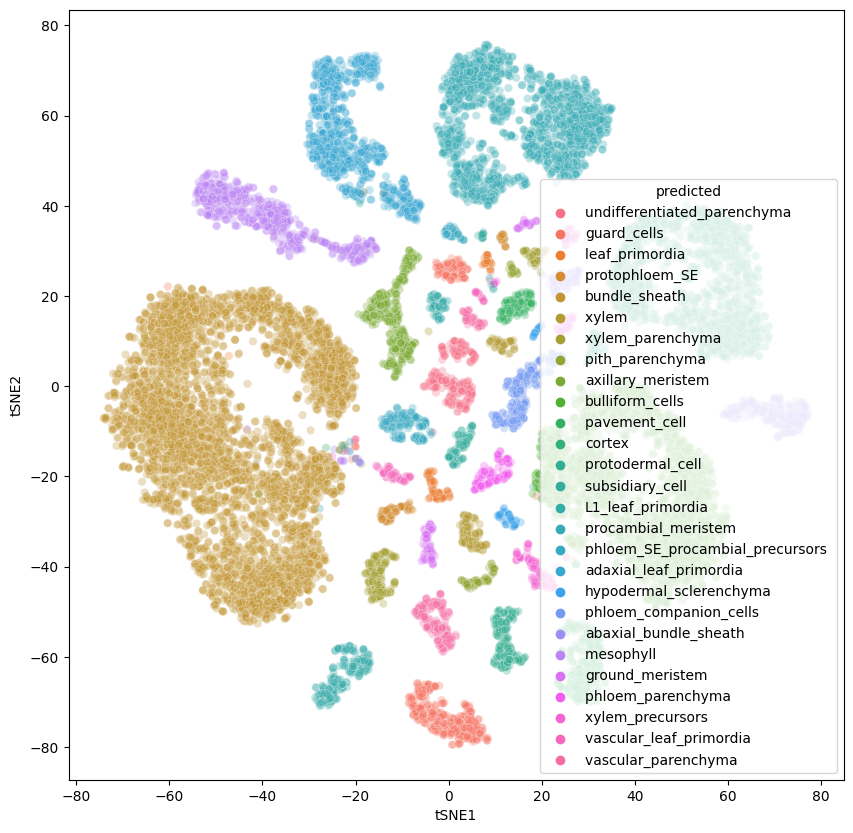

In [12]:
#print(df)
rna_labels = np.loadtxt('./data_10x/cellType_10xPBMC_rna_hard_filtered_numeric.txt')
atac_predictions = np.loadtxt('./output/exprs_10xPBMC_atac_harder_filtered_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
#print(df.shape)
#print(len(rna_labels))
#print(len(atac_predictions))
#print(len(labels))
label_to_idx = pd.read_csv('./data_10x/label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
#print(len(label_dic))
#print(labels)
#print(label_dic[labels.astype(int)[39]])

#print(labels)
#print(len(labels))
#print(label_dic[labels.astype(int)])
#print(len(label_dic[labels.astype(int)]))
#for x in labels.astype(int):
#    print(x)
#    print(label_dic[x])

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
#print(len(labels.astype(int)))
#print(df['data'])
#print(label_dic[labels.astype(int)])
#print(len(df['data']))
#print(label_dic)
#for item in labels:
#    print(item)
#    print(label_dic[item.astype(int)])
#print(labels[1])
#print(label_dic[labels[1].astype(int)])
df['predicted'] = label_dic[labels.astype(int)-1]



plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("exprs1-4_hard_filtered.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("exprs2-4_hard_filtered.png")

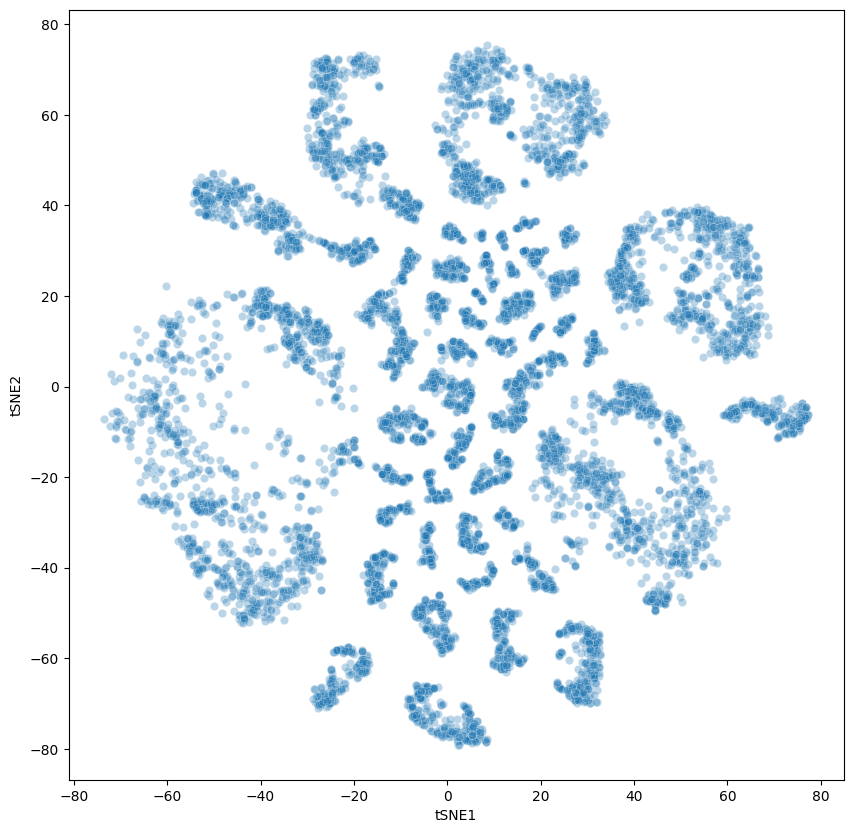

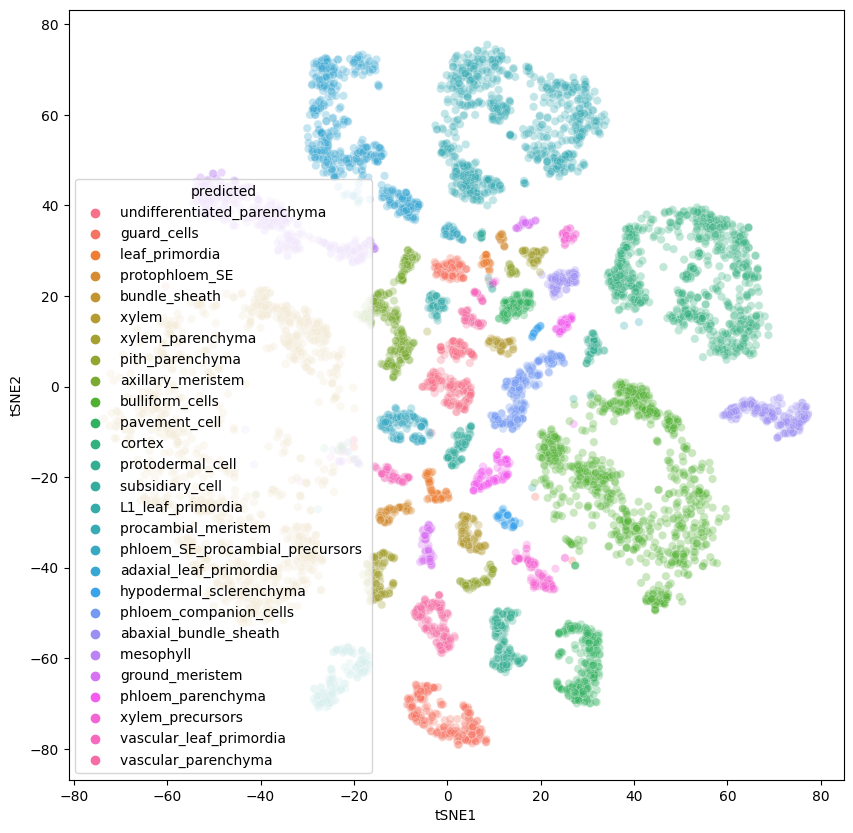

In [13]:
df_modi = df[df.data == "scRNA-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_hard_filtered_1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_hard_filtered_2.png")

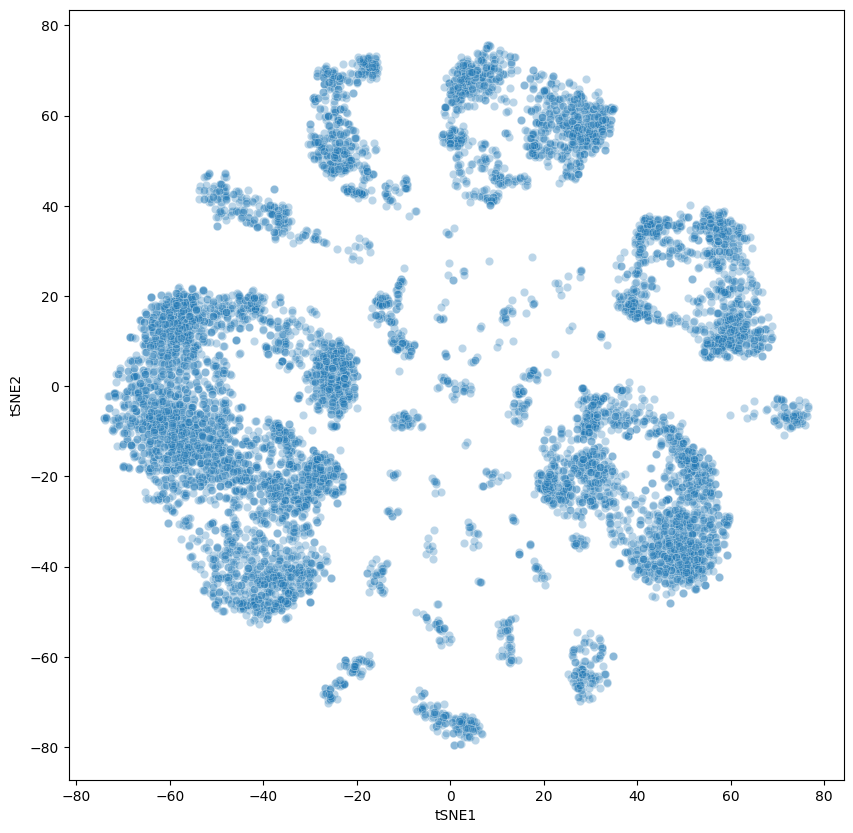

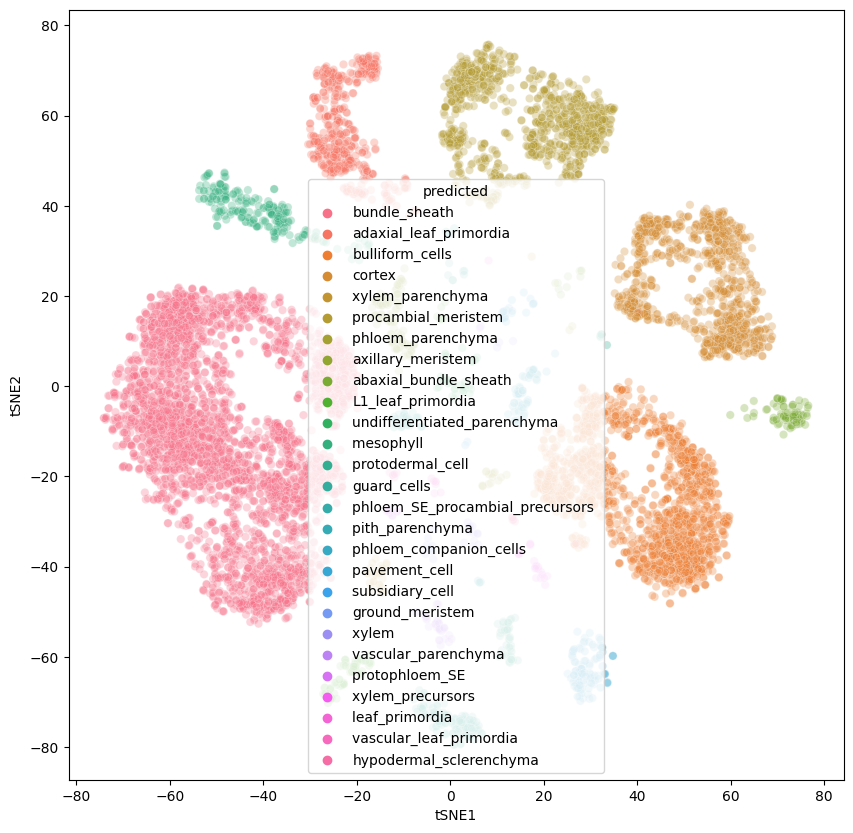

In [14]:
df_modi = df[df.data == "scATAC-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_hard_filtered_1-2.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("result_hard_filtered_2-2.png")

In [15]:
df_modi = df[df.data == "scATAC-seq"]
print(df_modi.predicted)

8437              bundle_sheath
8438     adaxial_leaf_primordia
8439              bundle_sheath
8440              bundle_sheath
8441              bundle_sheath
                  ...          
16869             bundle_sheath
16870           bulliform_cells
16871                    cortex
16872             bundle_sheath
16873             bundle_sheath
Name: predicted, Length: 8437, dtype: object


In [16]:
df_modi = df[df.data == "scRNA-seq"]
print(df_modi.predicted)

0       undifferentiated_parenchyma 
1       undifferentiated_parenchyma 
2       undifferentiated_parenchyma 
3       undifferentiated_parenchyma 
4       undifferentiated_parenchyma 
                    ...             
8432                 protophloem_SE 
8433                     guard_cells
8434            vascular_parenchyma 
8435          adaxial_leaf_primordia
8436          adaxial_leaf_primordia
Name: predicted, Length: 8437, dtype: object


In [17]:
list_num=[]
with open("ran_gen_x4_num_filtered.txt", "r") as r1:
    for lines in r1:
        list_num+=[lines.strip("\n")]
#print(list_num)

list_ATAC_label=[]
with open("data/maize_282.v8.3.scATAC_ALL_CELLs.metadata_reference.txt", "r") as r2:
    count=0
    for lines in r2:
        count+=1
        if count>1:
            list_ATAC_label+=[lines.split("\t")[-3]]

list_ATAC_label_fixed=[]
for item in list_num:
    #print(list_ATAC_label[int(item)])
    list_ATAC_label_fixed+=[list_ATAC_label[int(item)-1]]
    
print(list_ATAC_label_fixed)
#print(list_ATAC_label)
    

['pavement_cell', 'hypodermal_sclerenchyma', 'bundle_sheath', 'early_xylem_parenchyma', 'hypodermal_sclerenchyma', 'phloem_parenchyma', 'companion_cell', 'xylem', 'hypodermal_sclerenchyma', 'mesophyll', 'bundle_sheath', 'pavement_cell', 'pavement_cell', 'ground_meristem', 'hypodermal_sclerenchyma', 'mesophyll', 'dividing_leaf_primordia', 'pavement_cell', 'ground_meristem', 'lateral_organ_primordia', 'cortex/parenchyma', 'hypodermal_sclerenchyma', 'pavement_cell', 'dividing_leaf_primordia', 'cortex', 'ground_meristem', 'lignified_bundle_sheath', 'dividing_leaf_primordia', 'subsidiary_cells', 'pavement_cell', 'hypodermal_sclerenchyma', 'hypodermal_sclerenchyma', 'protophloem_SE', 'pavement_cell', 'subsidiary_cells', 'cortex/parenchyma', 'ground_meristem', 'procambial_meristem', 'ground_meristem', 'early_xylem_parenchyma', 'mesophyll', 'dividing_leaf_primordia', 'mesophyll', 'phloem_SE_procambial_precursors', 'dividing_leaf_primordia', 'dividing_leaf_primordia', 'lignified_bundle_sheath',

In [18]:
list_predicted=[]
for item in df_modi.predicted:
    list_predicted+=[item]

In [19]:
print(list_predicted)

['undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'guard_cells', 'undifferentiated_parenchyma ', 'leaf_primordia ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'protophloem_SE ', 'undifferentiated_parenchyma ', 'bundle_sheath', 'xylem ', 'xylem_parenchyma ', 'undifferentiated_parenchyma ', 'pith_parenchyma ', 'axillary_meristem', 'bulliform_cells', 'undifferentiated_parenchyma ', 'undifferentiated_parenchyma ', 'bundle_sheath', 'bundle_sheath', 'undifferentiated_parenchyma ', 'bundle_sheath', 'pavement_cell ', 'bulliform_cells', 'protophloem_SE ', 'cortex', 'bulliform_cells'

In [20]:
count=0
for x in range(len(list_predicted)):
    if list_predicted[x]==list_ATAC_label_fixed[x]:
        count+=1
print(count)

130


In [29]:
dict_list={}
for item in list_predicted:
    for item2 in list_ATAC_label_fixed:
    #if item not in dict_list
        if (item,item2) not in dict_list:
            dict_list[item,item2]=1
        else:
            dict_list[item,item2]+=1

In [30]:
#pd.DataFrame.from_dict(data)

{('undifferentiated_parenchyma ', 'pavement_cell'): 205065, ('undifferentiated_parenchyma ', 'hypodermal_sclerenchyma'): 171010, ('undifferentiated_parenchyma ', 'bundle_sheath'): 104860, ('undifferentiated_parenchyma ', 'early_xylem_parenchyma'): 55125, ('undifferentiated_parenchyma ', 'phloem_parenchyma'): 54635, ('undifferentiated_parenchyma ', 'companion_cell'): 38955, ('undifferentiated_parenchyma ', 'xylem'): 72520, ('undifferentiated_parenchyma ', 'mesophyll'): 117110, ('undifferentiated_parenchyma ', 'ground_meristem'): 204085, ('undifferentiated_parenchyma ', 'dividing_leaf_primordia'): 122010, ('undifferentiated_parenchyma ', 'lateral_organ_primordia'): 70560, ('undifferentiated_parenchyma ', 'cortex/parenchyma'): 44835, ('undifferentiated_parenchyma ', 'cortex'): 77665, ('undifferentiated_parenchyma ', 'lignified_bundle_sheath'): 32830, ('undifferentiated_parenchyma ', 'subsidiary_cells'): 99715, ('undifferentiated_parenchyma ', 'protophloem_SE'): 117845, ('undifferentiated_

In [115]:
import pandas as pd

cols=[]
rows=[]
value=[]
for item in dict_list:
    cols+=[item[1]]
    rows+=[item[0]]
    value+=[dict_list[item[0],item[1]]]
#data ={'area': ['new-hills', 'cape-town', 'mumbai'],
#       'rainfall':[100, 70, 200],
#       'temperature':[20, 25, 39]}
  
#df = pd.DataFrame.from_dict(data, orient ='index') 
#df
#data ={}
dict_list3={}
for item in dict_list:
    dict_list3[item[1]]=0
dict_list4={}
for item in dict_list:
    dict_list4[item[0]]=0
    
dict_list2={}

for item in dict_list4:
    #print(item)
    for item2 in dict_list3:
        #print(item2,item)
        #print((item2,item) in dict_list)
        if item not in dict_list2 and (item,item2) in dict_list:
            dict_list2[item]=[dict_list[item,item2]]
        if item in dict_list2 and (item,item2) in dict_list:
            dict_list2[item]+=[dict_list[item,item2]]
    
#print(rows)
#print(value)

In [116]:
print(dict_list2)

{'undifferentiated_parenchyma ': [205065, 205065, 171010, 104860, 55125, 54635, 38955, 72520, 117110, 204085, 122010, 70560, 44835, 77665, 32830, 99715, 117845, 67375, 84770, 77420, 67865, 46060, 39200, 44345, 47040, 3675, 490], 'guard_cells': [298809, 298809, 249186, 152796, 80325, 79611, 56763, 105672, 170646, 297381, 177786, 102816, 65331, 113169, 47838, 145299, 171717, 98175, 123522, 112812, 98889, 67116, 57120, 64617, 68544, 5355, 714], 'leaf_primordia ': [92907, 92907, 77478, 47508, 24975, 24753, 17649, 32856, 53058, 92463, 55278, 31968, 20313, 35187, 14874, 45177, 53391, 30525, 38406, 35076, 30747, 20868, 17760, 20091, 21312, 1665, 222], 'protophloem_SE ': [78678, 78678, 65612, 40232, 21150, 20962, 14946, 27824, 44932, 78302, 46812, 27072, 17202, 29798, 12596, 38258, 45214, 25850, 32524, 29704, 26038, 17672, 15040, 17014, 18048, 1410, 188], 'bundle_sheath': [916515, 916515, 764310, 468660, 246375, 244185, 174105, 324120, 523410, 912135, 545310, 315360, 200385, 347115, 146730, 44

In [109]:
#for item in dict_list:
#    print("pavement_cell"+","+"pavement_cell" == item )

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [117]:
for item in dict_list2:
    print(len(dict_list2[item]))

27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27


In [80]:
print(dict_list2)

{'undifferentiated_parenchyma ': [205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065, 205065], 'guard_cells': [298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809, 298809], 'leaf_primordia ': [92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907, 92907], 'protophloem_SE ': [78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678, 78678], 'bundle_sheath': [916515, 916515, 916515, 916515, 916515, 916515, 916515, 916515, 916515, 916515, 916515, 916515, 916515, 9165

In [118]:
df = pd.DataFrame(dict_list2)

In [122]:
print(dict_list3)

{'pavement_cell': 0, 'hypodermal_sclerenchyma': 0, 'bundle_sheath': 0, 'early_xylem_parenchyma': 0, 'phloem_parenchyma': 0, 'companion_cell': 0, 'xylem': 0, 'mesophyll': 0, 'ground_meristem': 0, 'dividing_leaf_primordia': 0, 'lateral_organ_primordia': 0, 'cortex/parenchyma': 0, 'cortex': 0, 'lignified_bundle_sheath': 0, 'subsidiary_cells': 0, 'protophloem_SE': 0, 'procambial_meristem': 0, 'phloem_SE_procambial_precursors': 0, 'axillary_meristem': 0, 'xylem_parenchyma': 0, 'rib_meristem_SAM': 0, 'undifferentiate_parenchyma': 0, 'guard_cell': 0, 'leaf_primordia/cortex': 0, 'unknown': 0, 'meristematic_parenchyma': 0}


In [126]:
print(list(dict_list3))

['pavement_cell', 'hypodermal_sclerenchyma', 'bundle_sheath', 'early_xylem_parenchyma', 'phloem_parenchyma', 'companion_cell', 'xylem', 'mesophyll', 'ground_meristem', 'dividing_leaf_primordia', 'lateral_organ_primordia', 'cortex/parenchyma', 'cortex', 'lignified_bundle_sheath', 'subsidiary_cells', 'protophloem_SE', 'procambial_meristem', 'phloem_SE_procambial_precursors', 'axillary_meristem', 'xylem_parenchyma', 'rib_meristem_SAM', 'undifferentiate_parenchyma', 'guard_cell', 'leaf_primordia/cortex', 'unknown', 'meristematic_parenchyma']


In [127]:
df["idx"]=["rows"]+list(dict_list3)

In [129]:
df.set_index('idx', inplace=True)


In [131]:
df = df.iloc[1: , :]

In [135]:
print(df.shape)

(26, 27)


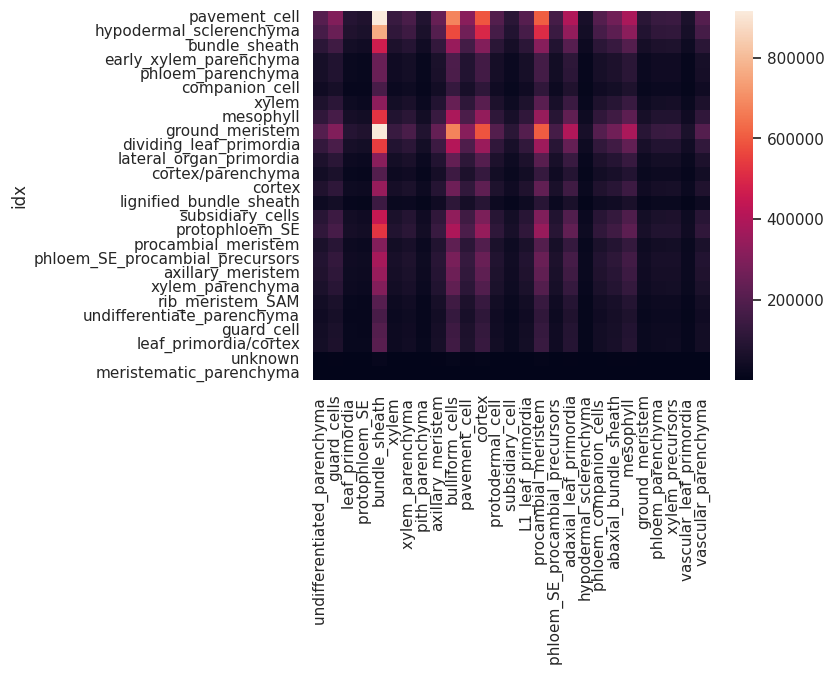

In [141]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(df,xticklabels=True, yticklabels=True)
fig = ax.get_figure()
#fig.savefig("out.png") 
#plt.tight_layout()
fig.savefig("heatmap_hard.png") 

TypeError: pcolormesh() takes 1 or 3 positional arguments but 2 were given

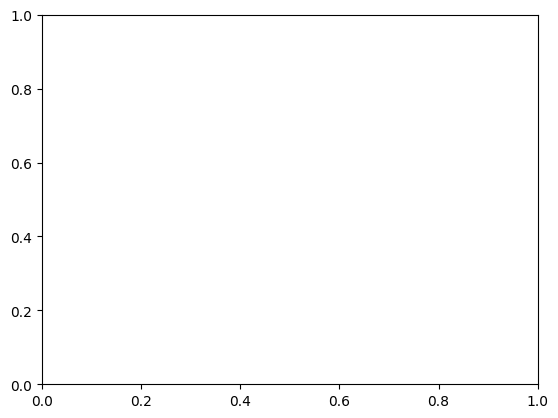

In [28]:
# = np.array(list_predicted)
#b = np.array(list_ATAC_label_fixed)

x, y = np.meshgrid(list_predicted, list_ATAC_label_fixed)

#convert intensity (list of lists) to a numpy array for plotting
#intensity = np.array(intensity)

#now just plug the data into pcolormesh, it's that easy!
plt.pcolormesh(x, y)#, intensity)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show() #boom